# Undirected Graphical Models

A set of r.v. described by an undirected graph. The edges (undirected) represent __probabilistic interactions__ between neighboring variables (as opposed to conditional dependence in DAGM). 

## Definitions
__Global Markov Property $G$__ - $X_A\perp X_B \mid X_C$ IFF $X_C$ separated $X_A$ from $X_B$, i.e. there is no path in the graph between $A$ and $B$ that doesn't go through $X_C$

__Local Markov Property (Markov Blanket) $L$__ - The set of nodes that renders a node $t$ conditionally dependent all the other nodes in the graph 
$$t\perp (V-cl(t)) | mv(t)$$
where $cl(t) = mb(t)\cup t$ is the closure.

__Pairwise (Markov) Property $P$__ - The set of nodes that renders two nodes, $s,t$, conditionally independent of each other. 
$$s\perp t \mid (V - \{s,t\}) \Leftrightarrow G(s,t)=0$$
$G$ is the number of edges between two nodes

# Exact Inference

## Problem Setting
Let $X_E$ be the observed evident, $X_F$ be the unobserved variable we want to infer, $X_R = X - \{X_F, X_E\}$ be all the remaining variables. 

Then, in a probabilistic graphical models, we need to marginalize out all $X_R$, focusing on the joint distribution over evidence and subject of inference.
$$p(X_F, X_E) = \sum_{X_R} p(X_F, X_E, X_R)$$
and the inference will be 
$$p(X_F|X_E) = p(\frac{X_F, X_E}{X_E}) = \frac{p(X_F, X_E)}{\sum_{X_F}p(X_F, X_E)}$$
and the conditional distribution 
$$p(X_E) = \sum_{X_F, X_R} p(X_F, X_E, X_R)$$
However, if $|X_R|$ are large, then this computing is huge, for continuous variables, integrating is even more computational intensive. 

## Variable Elimination
### Simple Example: Chain
Consider a chain $A\rightarrow B \rightarrow C\rightarrow D$ and $X_F = \{D\}, X_E = \{\}, X_R = \{A,B,C\}$
Note that $p(A,B,C,D) = p(A)p(B|A)p(C|B)p(D|C)$ so that 
\begin{align*}
p(D) &= \sum_{A,B,C}p(A,B,C,D) \\
&= \sum_C\sum_B\sum_A p(A)p(B|A)p(C|B)p(D|C)&\sim O(k^3)\\
&= \sum_Cp(D|C)\sum_Bp(C|B)\sum_Ap(A)p(B|A)\\
&= \sum_C p(D|C)\sum_Bp(C|B)p(B)\\
&= \sum_C p(D|C)p(C)&\sim O(nk^2)
\end{align*}

### Intermediate Factors
Consider the distribution given by 
$$p(X,A,B,C) = p(X)p(A|X)p(B|A)p(C|B,X)$$

Define __factor__ $\phi$ which are not necessarily normalized distributions, but which describes the local relationship between r.v.'s. 
\begin{align*}
p(A,B,C) &= \sum_X p(X)p(A|X)p(B|A)p(C|B,X)\\
&= \sum_{X}\phi(X) \phi(A,X)\phi(A,B)\phi(X,B,C)\\
&= \phi(A,B)\sum_X \phi(X)\phi(A,X)\phi(X,B,C)\\
&= \phi(A,B) \tau(A,B,C)
\end{align*}

### Sum-product Inference
Computing $P(Y)$ for directed and undirected models is given by __sum-product__ inference algorithm 
$$\tau(Y) = \sum_z\prod_{\phi\in \Phi}\phi(z_{Scope[\phi]\cap Z}, y_{Scope[\phi]\cap Y}), \forall Y$$
where $\Phi$ is a set of potential factors. 

### Complexity of Variable Elimination Ordering
The complexity is 
$$O(mk^{N_{max}})$$
- $m = |X_R|$ is the number of initial factors
- $k$ is the number of states each random variable takes (assuming equal)
- $N_{max} = \arg\max_i N_i$ where $N_i$ is the number of r.v. inside each sum $\sum_i$

## Inference in Trees (Message Passing)
For trees, the variable elimination has an optimal solution as from the leaves inwards to any any root. And the cost is linear to the number of nodes. 

### Belief Propagation Algorithm
Define the message send from variable $j$ to $i \in Neighbor(j)$ (regardless of the direction) as 
$$m_{j\rightarrow i} (x_i) = \sum_{x_j}\phi_j(x_j)\phi_{ij}(x_i,x_j)\prod_{k\in Neighbor(j)\neq i}m_{k\rightarrow j}(x_j)$$

And the Dynamic algorithm 
1. choose root $r$ arbitrarily
2. forward pass messages from leafs to $r$
3. backward pass messages from $r$ to leafs
4. compute $p(x_i)\propto \phi_i(x_i)\prod_{j\in Neighbor(i)}m_{j\rightarrow i}(x_i)$

#### Example

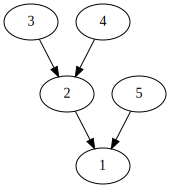

In [2]:
from graphviz import Digraph
dag = Digraph()
dag.edge('3', '2')
dag.edge('4', '2')
dag.edge('2', '1')
dag.edge('5', '1')
display(dag);

Then, the messages from leaf to root are:
\begin{align*}
m_{5\rightarrow 1} &= \sum_{x_5}\phi(x_5)\phi(x_1, x_5)\\
m_{3\rightarrow 2} &= \sum_{x_3}\phi(x_3)\phi(x_3, x_2)\\
m_{4\rightarrow 2} &= \sum_{x_4}\phi(x_4)\phi(x_2, x_4)\\
m_{2\rightarrow 1} &= \sum_{x_1}\phi(x_2)\phi(x_2, x_1)m_{3\rightarrow 2}(x_2)m_{4\rightarrow 2}(x_2)\\
\Rightarrow p(x_1)&\propto \phi(x_1)m_{2\rightarrow 1}(x_1)m_{5\rightarrow 1}(x_1)\\
\text{where } Z &= \sum_{x_1}p(x_1)
\end{align*}

## Hidden Markov Models
HMMs hide the temporal dependency by keeping it in the unobserved state. For each observation $x_i$, we associate a corresponding unobserved hidden/latent variable $z_i$ 

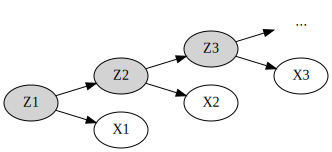

In [13]:
from graphviz import Digraph
dag = Digraph()
dag.edge('Z1', 'Z2')
dag.edge('Z1', 'X1')
dag.edge('Z2', 'Z3')
dag.edge('Z2', 'X2')
dag.edge('Z3', '...')
dag.edge('Z3', 'X3')
dag.node('Z1', style='filled')
dag.node('Z2', style='filled')
dag.node('Z3', style='filled')
dag.node('...', shape="none")
dag.graph_attr['rankdir'] = 'LR'
display(dag);

The joint distribution is then given by
$$p(x_{1:T}, z_{1:T}) = p(z_1)\prod_{t=2}^T p(z_t|z_{t-1})\prod_{t=1}^T p(x_t|z_t)$$

#### Parameterization
Assume we have a homogeneous (stationary) model, we need to learn 
- __Initial distribution__ $\pi(i) = p(z_1 = i)$ 
- __Transition distribution__ $T(i,j) = p(z_{t+1}=j|z_t = i)$
- __Emission probability__ $\epsilon_i(x) = p(x|z_t = i)$

### Forward-backward algorithm
We are interested in knowing the probability of a latent sequence given the observation sequence, i.e. $p(z_t |x_{1:T}), \forall t \in \{1:T\}$

Note that a HMM with finite $T$ (even infinite $T$ with initial state) will be be a tree. 

Then, given the initial $p(z_1)$, transition $p(z_t|z_{t-1})$, and emission $p(x_t|z_t)$. We need to inference 
 
 - __Filtering__ posterior over current hidden state $p(z_t|x_{1:t})$
 - __Prediction__ posterior over future hidden state $p(z_{t+k}|x_{1:t})$
 - __Smoothing__ posterior over past hidden state, $p(z_n|x_{1:t}), 1<n<t$
 
Then, note that for the filtering, for any $t\in T$. 
\begin{align*}
p(z_t|x_{1:T})&\propto p(z_t, x_{1:T})\\
&= p(z_t, x_{1:t})p(x_{t+1:T}|z_t, x_{1:t})\\
&= p(z_t, x_{1:t})p(x_{t+1:T}|z_t) 
\end{align*}
The last line holds as $x_{t+1:T}\perp x_{1:t}| z_t$ as $z_t$ is the common cause and prevents the dependency.

Then further note that $p(z_t, x_{1:t})p(x_{t+1:T}|z_t) $ follows some recursive steps from the initialization, transition, and emission. We then define the forward filtering and backward filtering as

#### Forward Filtering
\begin{align*}
\alpha_t(z_t) &= p(z_t, x_{1:t})\\&= \sum_{z_{t-1}} p(z_t, x_{1:t}, z_{t-1})\\
&= \sum_{z_{t-1}} p(x_t|z_{t-1}, z_t, x_{1:t-1})p(z_t|z_{t-1}, x_{1:t-1})p(z_{t-1}, x_{1:t-1})\\
&= \sum_{z_{t-1}} p(x_t|z_t) p(z_t|z_{t-1})a_t(z_{t-1})&\text{by cond. indep. }\\
&= p(x_t|z_t)\sum_{z_{t-1}}p(z_t|z_{t-1})\alpha_{t-1}(z_{t-1})
\end{align*}

Note that $a_1(z_1) = p(z_1, x_1) = p(z_1)p(x_1|z_1)$

#### Backward Filtering
\begin{align*}
\beta_t(z_t)
&=p(x_{t+1:T}|z_t)\\ 
&= \sum_{z_{t+1}} p(z_{t+1}, x_{t+1:T}|z_t)\\
&= \sum_{z_{t+1}}p(x_{t+2:T}|z_{t+1}, z_t, x_{t+1})p(x_{t+1}|z_{t+1}, z_t)p(z_{t+1}|z_t)\\
&= \sum_{z_{t+1}}p(x_{t+2:T}|z_{t+1})p(x_{t+1}|z_{t+1})p(z_{t+1}|z_t)\\
&= \sum_{z_{t+1}}\beta_{t+1}(z_{t+1})p(x_{t+1}|z_{t+1})p(z_{t+1}|z_t)
\end{align*}